In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

# # Create a new figure with desired dimensions
# plt.figure(figsize=(4, 2))  # Width: 8 inches, Height: 6 inches

# sns.set(rc={'figure.figsize': (4, 2)})

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 2]

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
'''
Data Dictionary
Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.
''';

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
# dropar cabin pois tem missing values demais
df = df.drop(['Cabin'], axis = 1)

## Feature engineering

In [9]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


## Data visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

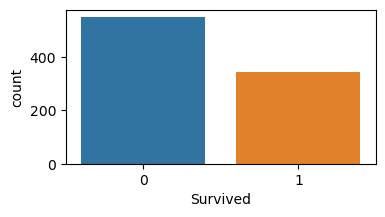

In [11]:
sns.countplot(x='Survived', data=df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

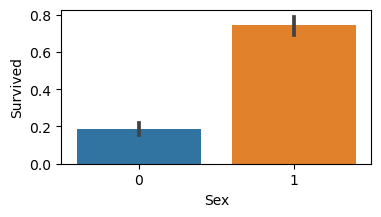

In [12]:
sns.barplot(x='Sex', y='Survived', data=df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

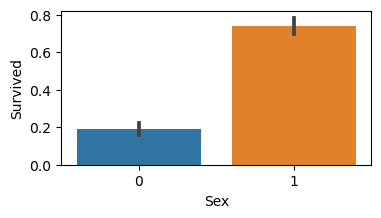

In [13]:
sns.barplot(x='Sex', y='Survived', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

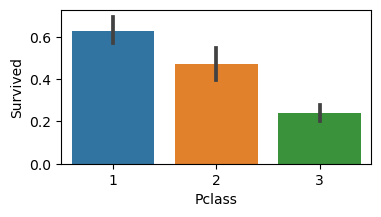

In [14]:
sns.barplot(x='Pclass', y='Survived', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

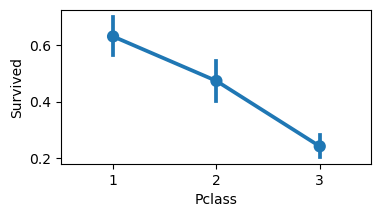

In [15]:
sns.pointplot(x='Pclass', y='Survived', data=df)

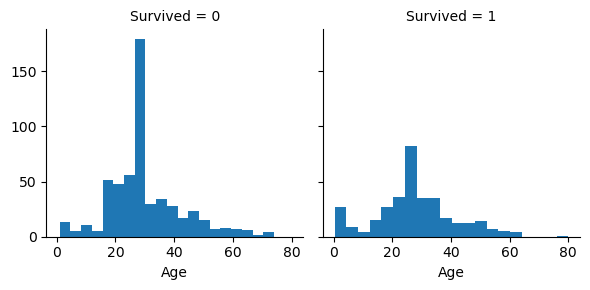

In [16]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

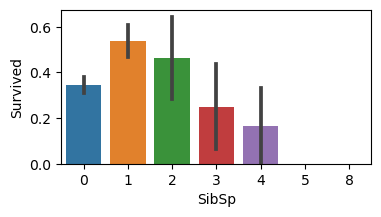

In [17]:
sns.barplot(x='SibSp', y='Survived', data=df)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

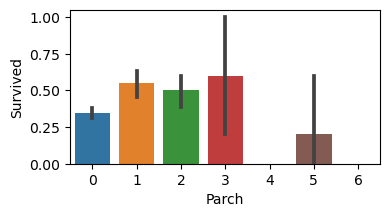

In [18]:
sns.barplot(x='Parch', y='Survived', data=df)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

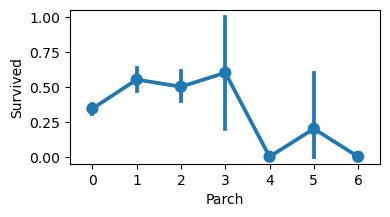

In [19]:
sns.pointplot(x='Parch', y='Survived', data=df)

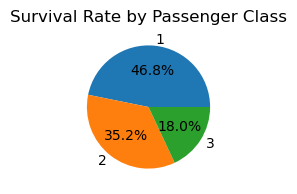

In [20]:
pclass_survival = df.groupby('Pclass')['Survived'].mean()
plt.pie(pclass_survival, labels = pclass_survival.index, autopct='%1.1f%%')
plt.title('Survival Rate by Passenger Class')
plt.show()

In [21]:
pclass_survival

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

## Model building

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [23]:
len(df['Fare'].value_counts())

248

<AxesSubplot:xlabel='Fare', ylabel='Count'>

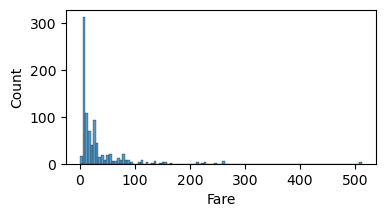

In [24]:
import seaborn as sns
sns.histplot(df['Fare'])


In [25]:
import numpy as np
df['Fare'] = np.log1p(df['Fare'])


<AxesSubplot:xlabel='Fare', ylabel='Count'>

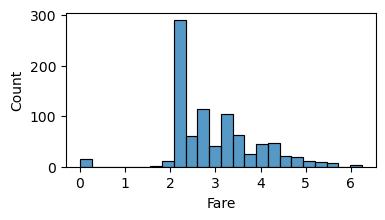

In [26]:
sns.histplot(df['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

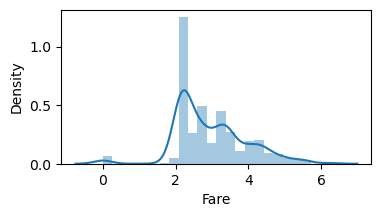

In [27]:
sns.distplot(df['Fare'])

In [28]:
# One hot encoding to turn categorical column "Embarked" into numerical data
df = pd.get_dummies(df, columns=['Embarked'])

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,2.110213,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.280593,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.188856,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.990834,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.202765,0,0,1


In [30]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [31]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked_C','Embarked_Q','Embarked_S']]
y = df['Survived']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy:  0.7988826815642458
[[89 16]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [33]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


Cross-validation scores: [0.82517483 0.7972028  0.78873239 0.73943662 0.79577465]
Average cross-validation score: 0.79
Accuracy:  0.7988826815642458
[[89 16]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [34]:
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

scores = cross_validate(model, X_train, y_train, cv=5, return_train_score=True, scoring=['accuracy', 'recall', 'precision'])

print("Cross-validation scores: ")
print(scores)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


Cross-validation scores: 
{'fit_time': array([0.02201152, 0.02262187, 0.01600003, 0.01900005, 0.02599978]), 'score_time': array([0.00199962, 0.00199986, 0.00197554, 0.00300002, 0.00300002]), 'test_accuracy': array([0.82517483, 0.7972028 , 0.78873239, 0.73943662, 0.79577465]), 'train_accuracy': array([0.79613357, 0.79789104, 0.80350877, 0.8245614 , 0.79298246]), 'test_recall': array([0.7037037 , 0.68518519, 0.69811321, 0.56603774, 0.75925926]), 'train_recall': array([0.69158879, 0.69158879, 0.68372093, 0.72093023, 0.69158879]), 'test_precision': array([0.80851064, 0.75510204, 0.7254902 , 0.68181818, 0.71929825]), 'train_precision': array([0.74747475, 0.75126904, 0.76963351, 0.79487179, 0.74      ])}
Accuracy:  0.7988826815642458
[[89 16]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79  

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

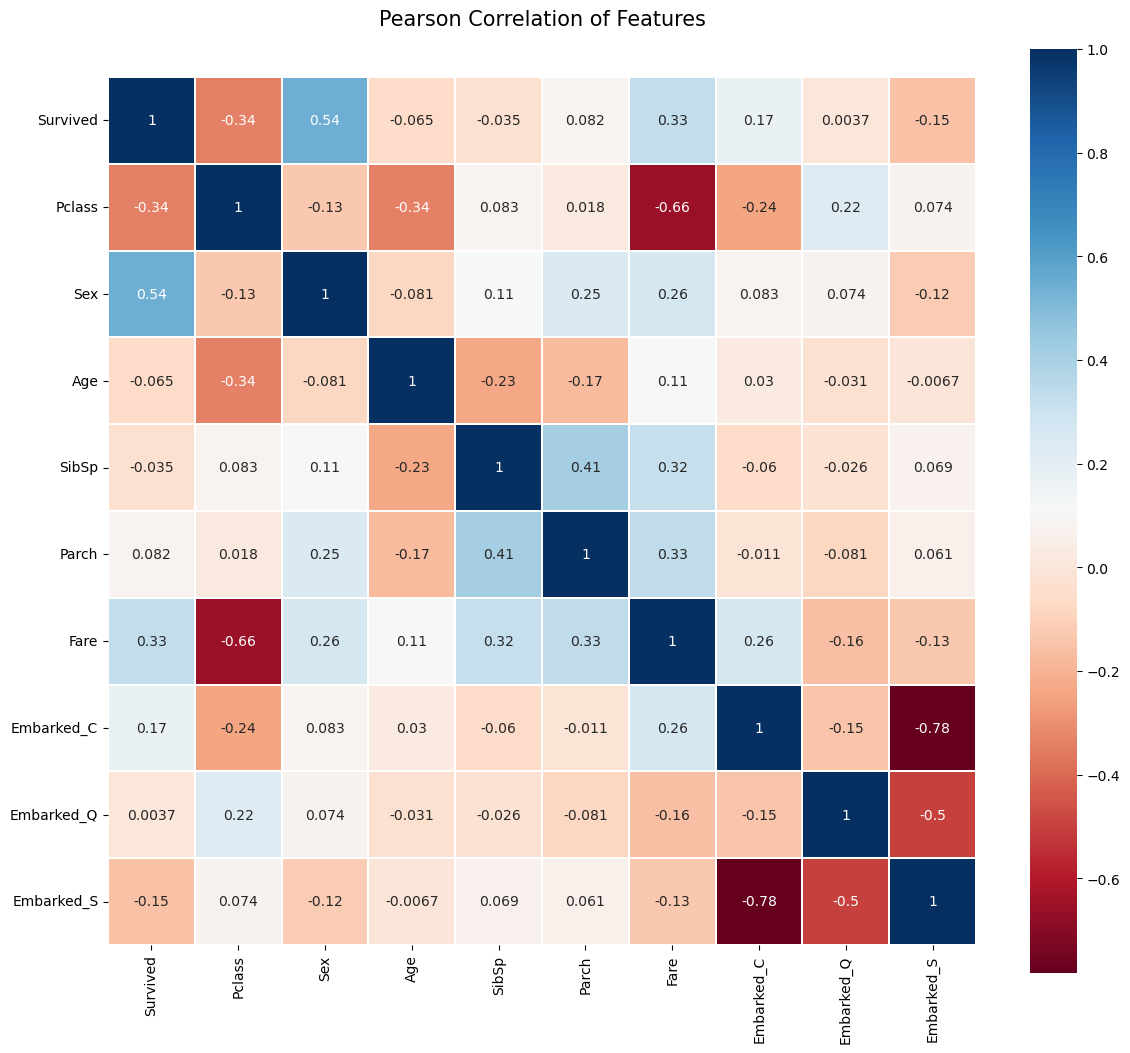

In [35]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df[['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked_C','Embarked_Q','Embarked_S']].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

clf = GridSearchCV(LogisticRegression(penalty='l2', max_iter=1000), param_grid)

GridSearchCV(cv=None,
             estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
               dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

clf.fit(X_train, y_train)


from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.82517483 0.7972028  0.78873239 0.73943662 0.73943662]
Average cross-validation score: 0.78


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

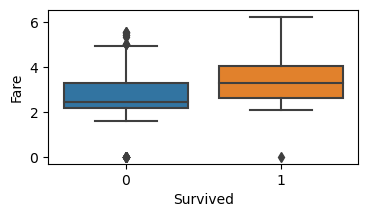

In [37]:
sns.boxplot(x='Survived', y='Fare', data=df)

<AxesSubplot:xlabel='Embarked_C', ylabel='Survived'>

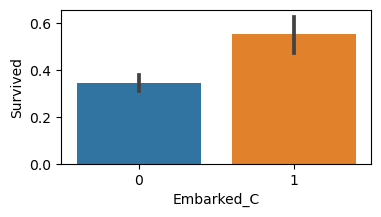

In [38]:
sns.barplot(x='Embarked_C', y='Survived', data=df)

<AxesSubplot:xlabel='Embarked_C', ylabel='count'>

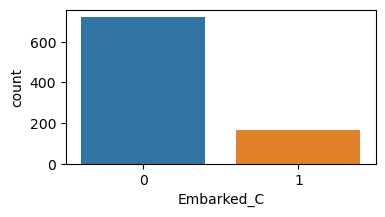

In [39]:
sns.countplot(x='Embarked_C', data=df)

In [40]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

# Define the parameter values that should be searched
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

# Instantiate the grid
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid with data
grid.fit(X_train, y_train)

# View the complete results
print("Best parameters: ", grid.best_params_)
print("Best cross-validation score: ", grid.best_score_)

# Train and test using the best parameters
best_model = LogisticRegression(max_iter=1000, C=grid.best_params_['C'], penalty=grid.best_params_['penalty'])
best_model.fit(X_train, y_train)

predictions = best_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


Best parameters:  {'C': 1, 'penalty': 'l2'}
Best cross-validation score:  0.7892642568698907
Accuracy:  0.7988826815642458
[[89 16]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## Random forest

In [48]:
df = pd.read_csv('train.csv')
df.head()

df.isnull().sum()

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.describe()

# dropar cabin pois tem missing values demais
df = df.drop(['Cabin'], axis = 1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One hot encoding to turn categorical column "Embarked" into numerical data
df = pd.get_dummies(df, columns=['Embarked'])

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked_C','Embarked_Q','Embarked_S']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

print("Best parameters: ", rf_random.best_params_)
print("Best cross-validation score: ", rf_random.best_score_)

best_rf_model = RandomForestClassifier(n_estimators=rf_random.best_params_['n_estimators'],
                                       max_features=rf_random.best_params_['max_features'],
                                       max_depth=rf_random.best_params_['max_depth'],
                                       min_samples_split=rf_random.best_params_['min_samples_split'],
                                       min_samples_leaf=rf_random.best_params_['min_samples_leaf'],
                                       bootstrap=rf_random.best_params_['bootstrap'])

best_rf_model.fit(X_train, y_train)

rf_predictions = best_rf_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters:  {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}
Best cross-validation score:  0.8272234807446074
Accuracy:  0.8100558659217877
[[94 11]
 [23 51]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [42]:
importances = best_rf_model.feature_importances_
importances

array([0.13151966, 0.41808204, 0.1373245 , 0.04312311, 0.03138164,
       0.20060566, 0.01682471, 0.00516104, 0.01597763])

In [43]:
# Apply the model to the test data

df = pd.read_csv('test.csv')

In [44]:
df.isnull().sum()

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.describe()

# dropar cabin pois tem missing values demais
df = df.drop(['Cabin'], axis = 1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One hot encoding to turn categorical column "Embarked" into numerical data
df = pd.get_dummies(df, columns=['Embarked'])

In [45]:
df
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked_C','Embarked_Q','Embarked_S']]
df.isnull().sum()
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [46]:
test_predictions = best_rf_model.predict(df)
test_predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
df = pd.read_csv('test.csv')
ids = df['PassengerId']
ids

# Create a dataframe with the passenger IDs and the predictions
output = pd.DataFrame({'PassengerId': ids, 'Survived': test_predictions})
output
# # Write the dataframe to a csv file
output.to_csv('my_submission.csv', index=False)

# This achieved 0.77751 score on this problem.

## Feature engineering to try and get a >80% score

In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Fill missing age data with median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Fill missing Fare data with median
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Feature Engineering

# Family size feature
train_data['Family_Size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Family_Size'] = test_data['SibSp'] + test_data['Parch'] + 1

# Fare per person
train_data['Fare_Per_Person'] = train_data['Fare'] / train_data['Family_Size']
test_data['Fare_Per_Person'] = test_data['Fare'] / test_data['Family_Size']

# Women and children first
train_data['Women_Children'] = ((train_data['Sex'] == 'female') | (train_data['Age'] < 16)).astype(int)
test_data['Women_Children'] = ((test_data['Sex'] == 'female') | (test_data['Age'] < 16)).astype(int)

# Convert 'Sex' to numeric
genders = {"male": 0, "female": 1}
train_data['Sex'] = train_data['Sex'].map(genders)
test_data['Sex'] = test_data['Sex'].map(genders)

# Select features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Family_Size', 'Fare_Per_Person', 'Women_Children']

# Prepare for modeling
X_train = train_data[features]
y_train = train_data['Survived']
X_test = test_data[features]

# Instantiate model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# Train model
model.fit(X_train, y_train)



# Predict
predictions = model.predict(X_test)

# If you have true values for the test set, you can calculate the accuracy
# true_values = pd.read_csv('gender_submission.csv')  # assuming you have a gender_submission.csv file with true values
# print('Accuracy:', accuracy_score(true_values, predictions))


In [ ]:
print("Accuracy: ", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))